#week 1

Data exploration and preprocessing

In [167]:
# importing  necessery libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [168]:
# loading the dataset

df = pd.read_csv('/content/dsa_job - data_science_job.csv')
df

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2022,Machine Learning Engineer in office,Analysis,EUR,186597,136086,US,MI,CT,Remote,DE,L
1,2020,Statistician (Remote),ML/AI,JPY,110630,67982,JP,EX,FL,Remote,IN,M
2,2022,Machine Learning Engineer,ML/AI,INR,61280,153309,UK,MI,CT,Hybrid,CN,L
3,2022,Data Analyst in office,ML/AI,JPY,154130,135242,DE,SE,FT,Hybrid,MX,L
4,2020,Statistician,Data Science,EUR,172312,35156,UK,MI,FT,In-person,UK,S
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2020,Machine Learning Engineer (Remote),NaN,NaN,179769,179111,UK,NaN,CT,In-person,IN,NaN
4996,2021,Machine Learning Engineer (Remote),NaN,NaN,184642,196373,CN,NaN,FL,Remote,UK,NaN
4997,2022,Machine Learning Engineer,Analysis,GBP,135319,51366,UK,EN,FL,Hybrid,JP,M
4998,2021,Statistician,Data Science,EUR,58037,181817,US,MI,PT,Remote,DE,S


In [169]:
df.shape

(5000, 12)

In [170]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           5000 non-null   int64 
 1   job_title           5000 non-null   object
 2   job_category        4500 non-null   object
 3   salary_currency     4500 non-null   object
 4   salary              5000 non-null   int64 
 5   salary_in_usd       5000 non-null   int64 
 6   employee_residence  5000 non-null   object
 7   experience_level    4500 non-null   object
 8   employment_type     5000 non-null   object
 9   work_setting        5000 non-null   object
 10  company_location    5000 non-null   object
 11  company_size        4500 non-null   object
dtypes: int64(3), object(9)
memory usage: 468.9+ KB


In [171]:
df.describe()

,work_year,salary,salary_in_usd
count,5000.00000,5000.000000,5000.000000
mean,2020.97680,102046.307200,114076.995800
std,0.81951,70853.626492,49113.807687
min,2020.00000,-198754.000000,30016.000000
25%,2020.00000,64295.500000,71343.750000
50%,2021.00000,110636.000000,114167.000000
75%,2022.00000,153104.750000,156665.750000
max,2022.00000,199924.000000,199985.000000


In [172]:
#detecting missing values
df.isnull().sum()

,0
work_year,0
job_title,0
job_category,500
salary_currency,500
salary,0
salary_in_usd,0
employee_residence,0
experience_level,500
employment_type,0
work_setting,0


In [173]:
# handling missing values
# imputing

df['job_category'].fillna(df['job_category'].mode()[0],inplace=True)
df['salary_currency'].fillna(df['salary_currency'].mode()[0],inplace=True)
df['experience_level'].fillna(df['experience_level'].mode()[0],inplace=True)
df['company_size'].fillna(df['company_size'].mode()[0],inplace=True)
df['salary'].fillna(df['salary'].median(), inplace=True)
df.dropna(subset=['salary_in_usd'], inplace=True)  # Drop rows with missing target variable

df.isnull().sum()

<ipython-input-173-08f4e3cacd3a>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['job_category'].fillna(df['job_category'].mode()[0],inplace=True)
<ipython-input-173-08f4e3cacd3a>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

,0
work_year,0
job_title,0
job_category,0
salary_currency,0
salary,0
salary_in_usd,0
employee_residence,0
experience_level,0
employment_type,0
work_setting,0


In [174]:
# checking if there any inconsistent values

df.nunique()


,0
work_year,3
job_title,15
job_category,4
salary_currency,5
salary,4943
salary_in_usd,4927
employee_residence,7
experience_level,4
employment_type,4
work_setting,3


In [175]:
df['job_title'].unique()

array(['Machine Learning Engineer  in office', 'Statistician  (Remote)',
       'Machine Learning Engineer', 'Data Analyst  in office',
       'Statistician', 'Data Scientist  (Remote)', 'Data Analyst',
       'Data Engineer  in office', 'Data Scientist',
       'Machine Learning Engineer  (Remote)', 'Data Engineer',
       'Data Engineer  (Remote)', 'Data Scientist  in office',
       'Data Analyst  (Remote)', 'Statistician  in office'], dtype=object)

In [176]:
#standerdizing case
for col in ['job_title', 'job_category', 'employee_residence', 'company_location','salary_currency','experience_level','employment_type','work_setting','company_size']:
    df[col] = df[col].str.lower().str.strip()
df['job_title'].unique()





array(['machine learning engineer  in office', 'statistician  (remote)',
       'machine learning engineer', 'data analyst  in office',
       'statistician', 'data scientist  (remote)', 'data analyst',
       'data engineer  in office', 'data scientist',
       'machine learning engineer  (remote)', 'data engineer',
       'data engineer  (remote)', 'data scientist  in office',
       'data analyst  (remote)', 'statistician  in office'], dtype=object)

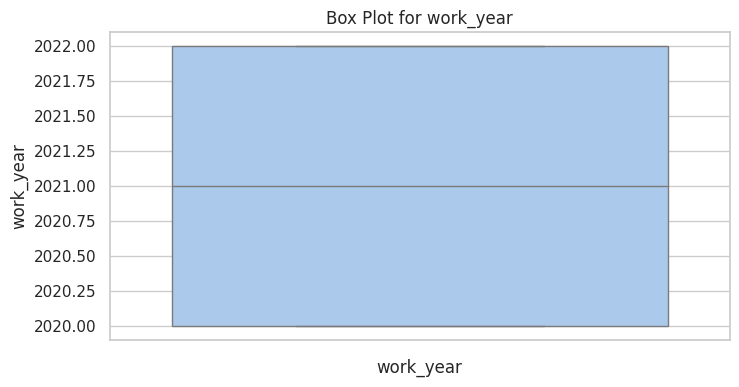

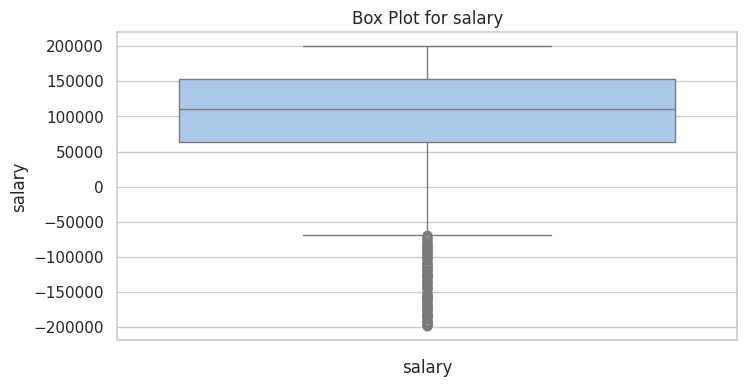

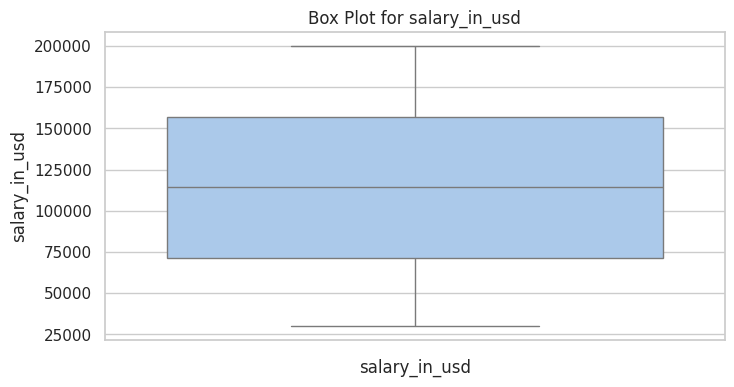

In [177]:
# identifying outliers
# FOR numerical columns

# Identify numerical columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Generate box plots for each numeric column
for column in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(df[column])
    plt.title(f"Box Plot for {column}")
    plt.xlabel(column)
    plt.show()





In [178]:
# handling numerical columns
# Define a function to handle numerical outliers
def handle_numerical_outliers(df, column, method="remove"):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    if method == "remove":
        # Remove rows with outliers
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    elif method == "cap":
        # Cap outliers to the bounds
        df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    elif method == "transform":
        # Apply a log transformation (if values are positive)
        df[column] = df[column].apply(lambda x: np.log(x) if x > 0 else x)

    return df

# Apply the function to all numerical columns
for column in numeric_columns:
    df = handle_numerical_outliers(df, column, method="cap")


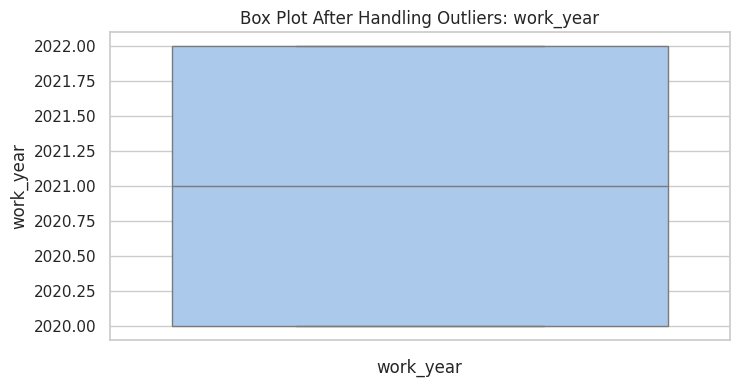

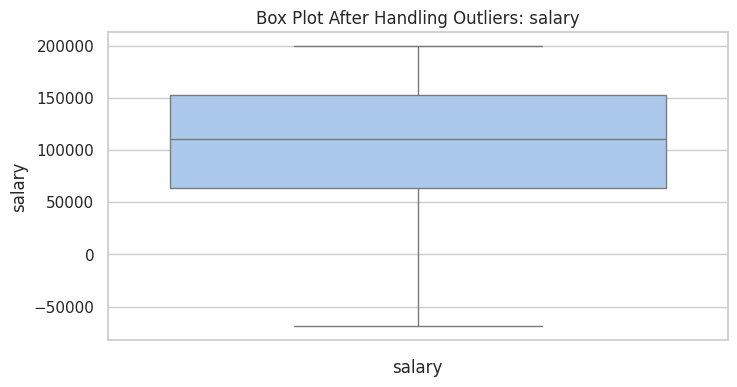

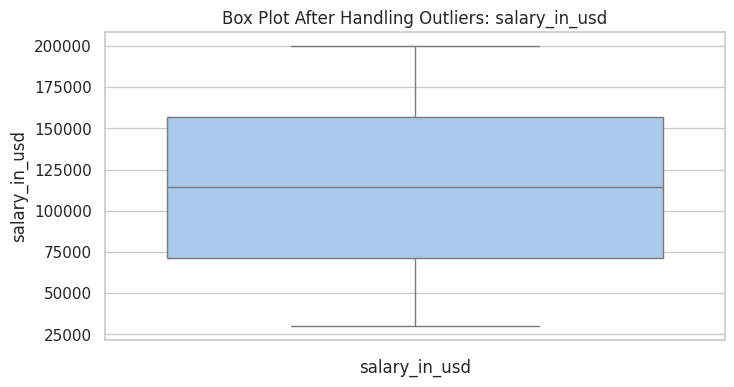

In [179]:
# validating
# Check updated box plots for numerical columns
for column in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(df[column])
    plt.title(f"Box Plot After Handling Outliers: {column}")
    plt.xlabel(column)
    plt.show()

In [180]:
# for categorical columns
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Check value counts for each categorical column
for column in categorical_columns:
    print(f"Value counts for {column}:\n")
    print(df[column].value_counts())
    print("\nRare categories in {column}:\n")

    # Detect rare values (e.g., less than 5 occurrences)
    rare_categories = df[column].value_counts()[df[column].value_counts() < 5]
    print(rare_categories)
    print("\n" + "-"*50 + "\n")

Value counts for job_title:

job_title
data engineer  in office                372
data engineer                           355
statistician                            354
data scientist                          353
data analyst  in office                 339
data engineer  (remote)                 338
data analyst  (remote)                  336
machine learning engineer  in office    331
data scientist  in office               330
machine learning engineer  (remote)     327
statistician  (remote)                  323
statistician  in office                 317
data scientist  (remote)                310
data analyst                            309
machine learning engineer               306
Name: count, dtype: int64

Rare categories in {column}:

Series([], Name: count, dtype: int64)

--------------------------------------------------

Value counts for job_category:

job_category
data science    1673
ml/ai           1151
analysis        1108
engineering     1068
Name: count, dtype: int6

In [181]:
# handling outliers for categorical columns
# Define a function to handle categorical outliers
def handle_categorical_outliers(df, column, threshold=5):
    # Find rare categories
    value_counts = df[column].value_counts()
    rare_categories = value_counts[value_counts < threshold].index

    # Replace rare categories with "Other"
    df[column] = df[column].apply(lambda x: "Other" if x in rare_categories else x)
    return df

# Apply the function to all categorical columns
for column in categorical_columns:
    df = handle_categorical_outliers(df, column, threshold=5)  # Adjust threshold as needed



In [182]:
# validating

# Check updated value counts for categorical columns
for column in categorical_columns:
    print(f"Value counts for {column} after handling outliers:\n")
    print(df[column].value_counts())
    print("\n" + "-"*50 + "\n")

Value counts for job_title after handling outliers:

job_title
data engineer  in office                372
data engineer                           355
statistician                            354
data scientist                          353
data analyst  in office                 339
data engineer  (remote)                 338
data analyst  (remote)                  336
machine learning engineer  in office    331
data scientist  in office               330
machine learning engineer  (remote)     327
statistician  (remote)                  323
statistician  in office                 317
data scientist  (remote)                310
data analyst                            309
machine learning engineer               306
Name: count, dtype: int64

--------------------------------------------------

Value counts for job_category after handling outliers:

job_category
data science    1673
ml/ai           1151
analysis        1108
engineering     1068
Name: count, dtype: int64

------------------

In [183]:
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2022,machine learning engineer in office,analysis,eur,186597.0,136086,us,mi,ct,remote,de,l
1,2020,statistician (remote),ml/ai,jpy,110630.0,67982,jp,ex,fl,remote,in,m
2,2022,machine learning engineer,ml/ai,inr,61280.0,153309,uk,mi,ct,hybrid,cn,l
3,2022,data analyst in office,ml/ai,jpy,154130.0,135242,de,se,ft,hybrid,mx,l
4,2020,statistician,data science,eur,172312.0,35156,uk,mi,ft,in-person,uk,s


In [184]:
# #dropping the salary column
df.drop('salary',axis=1,inplace=True)

In [185]:
# Descriptive statistics
print(df.describe())



        work_year  salary_in_usd
count  5000.00000    5000.000000
mean   2020.97680  114076.995800
std       0.81951   49113.807687
min    2020.00000   30016.000000
25%    2020.00000   71343.750000
50%    2021.00000  114167.000000
75%    2022.00000  156665.750000
max    2022.00000  199985.000000


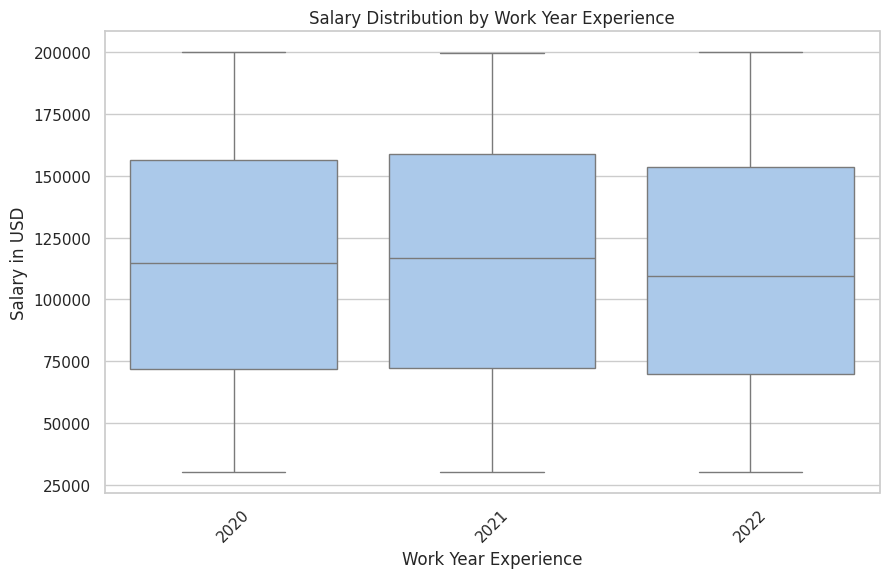

In [186]:
# EXPLORATORY DATA ANALYSIS
#Salary vs. Work Year

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='work_year', y='salary_in_usd')
plt.title('Salary Distribution by Work Year Experience')
plt.xlabel('Work Year Experience')
plt.ylabel('Salary in USD')
plt.xticks(rotation=45)
plt.show()


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

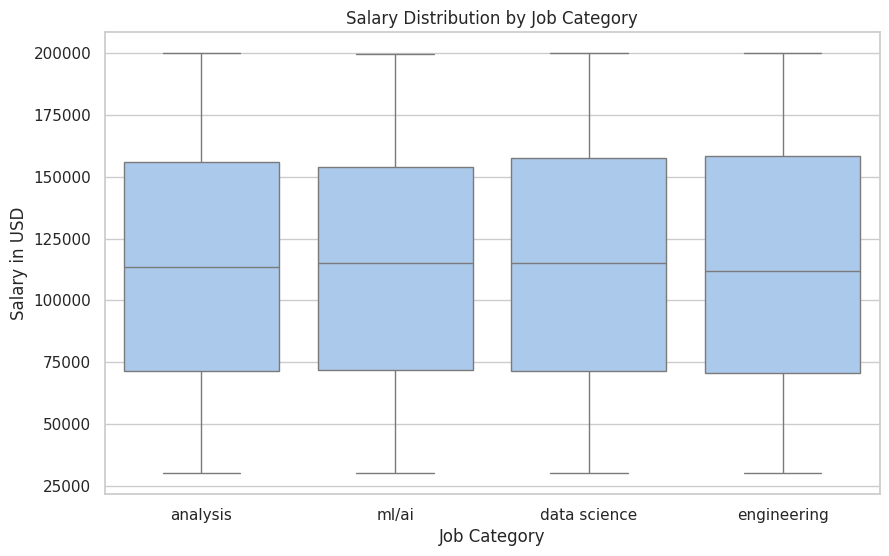

In [187]:
# Plot salary distribution by job_category
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='job_category', y='salary_in_usd')
plt.title('Salary Distribution by Job Category')
plt.xlabel('Job Category')
plt.ylabel('Salary in USD')
plt


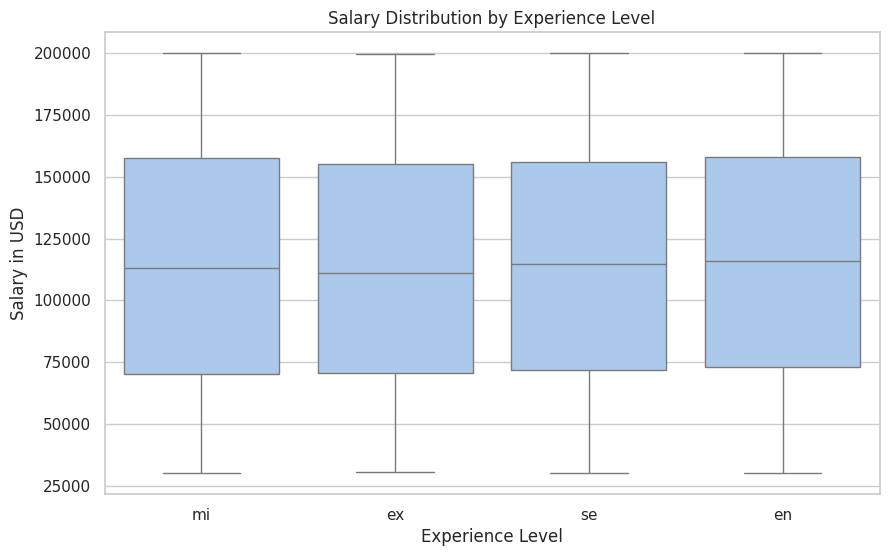

In [188]:
# Plot salary distribution by experience_level
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='experience_level', y='salary_in_usd')
plt.title('Salary Distribution by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.show()

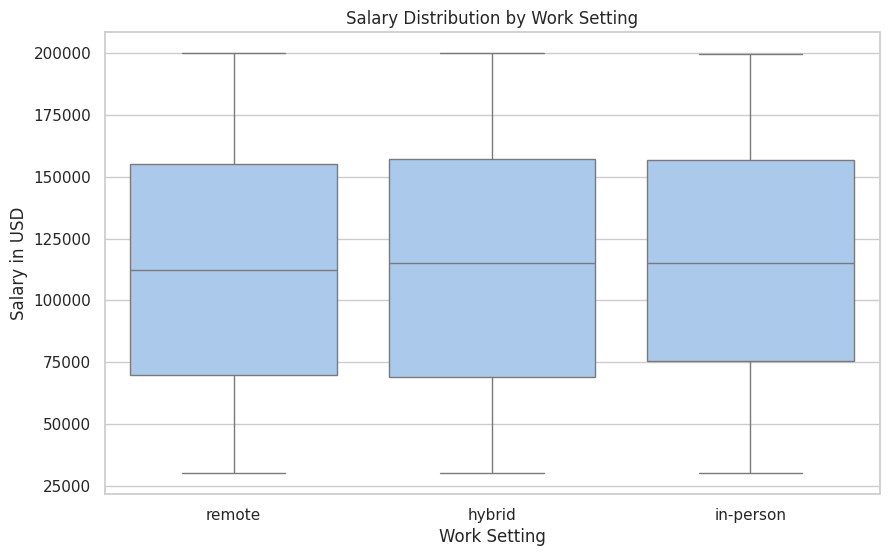

In [189]:
# Plot salary distribution by work_setting
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='work_setting', y='salary_in_usd')
plt.title('Salary Distribution by Work Setting')
plt.xlabel('Work Setting')
plt.ylabel('Salary in USD')
plt.show()

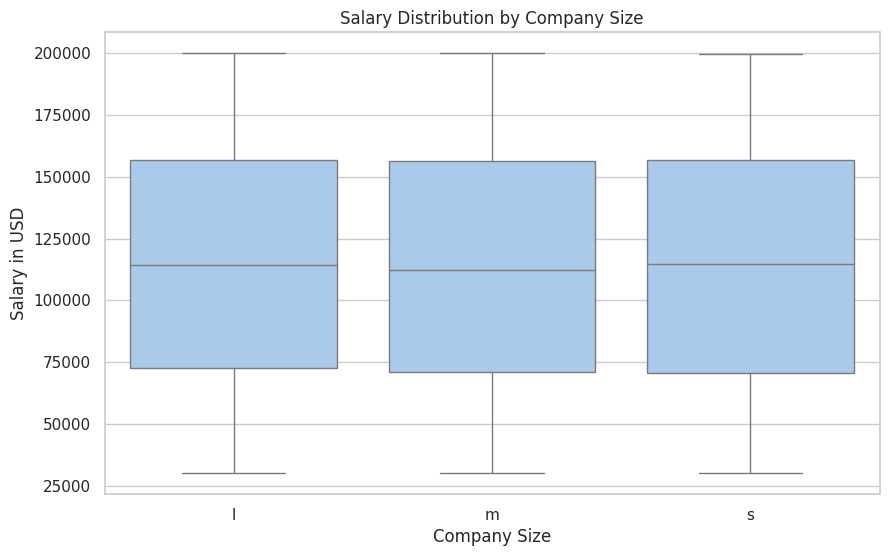

In [190]:
# Plot salary distribution by company_size
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='company_size', y='salary_in_usd')
plt.title('Salary Distribution by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Salary in USD')
plt.show()

# documentation
During data cleaning, missing values were handled using appropriate imputation techniques, and outliers in the `salary_in_usd` column were addressed through IQR-based filtering and capping to maintain data integrity. Redundant columns, such as `salary` and `salary_currency`, were dropped, and categorical variables like `job_title` and `job_category` were encoded for compatibility with machine learning models. Exploratory Data Analysis revealed significant insights: salaries tend to increase with experience, remote jobs show higher salary distributions, and larger companies generally offer better pay. Categories like `ml/ai` and `data science` stand out with higher median salaries. Challenges included inconsistent formatting in some categorical data, balancing outlier handling without distorting variability, and encoding high-cardinality features like `job_title`. These steps and insights will guide feature engineering and model selection for accurate salary predictions.


##week 2

Feature Engineering and Model Selection

In [191]:
# Feature Engineering
# Extracting potential seniority information from job_title
df['seniority'] = df['job_title'].str.contains('Senior|Lead|Principal', case=False).astype(int)

# Categorizing regions from employee_residence
region_map = {'us': 'North America', 'uk': 'Europe', 'jp': 'Asia', 'in': 'Asia',
              'de': 'Europe', 'mx': 'North America', 'cn': 'Asia'}
df['employee_region'] = df['employee_residence'].map(region_map)

# Creating interaction term: experience level with company size
df['experience_company_interaction'] = df['experience_level'] + "_" + df['company_size']


In [202]:
# encoding the categorical columns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


# Label Encoding for ordered categorical columns
label_encoder = LabelEncoder()
df['experience_company_interaction'] = label_encoder.fit_transform(df['experience_company_interaction'])

# One-Hot Encoding for unordered categorical columns
df = pd.get_dummies(df, columns=['employee_region'], drop_first=True)
# Output encoded columns
print(df.head())


   work_year  salary_in_usd  seniority  experience_company_interaction  \
0       2022         136086          0                               6   
1       2020          67982          0                               4   
2       2022         153309          0                               6   
3       2022         135242          0                               9   
4       2020          35156          0                               8   

   job_title_data analyst  (remote)  job_title_data analyst  in office  \
0                             False                              False   
1                             False                              False   
2                             False                              False   
3                             False                               True   
4                             False                              False   

   job_title_data engineer  job_title_data engineer  (remote)  \
0                    False                   

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 49 columns):
 #   Column                                          Non-Null Count  Dtype
---  ------                                          --------------  -----
 0   work_year                                       5000 non-null   int64
 1   salary_in_usd                                   5000 non-null   int64
 2   seniority                                       5000 non-null   int64
 3   experience_company_interaction                  5000 non-null   int64
 4   job_title_data analyst  (remote)                5000 non-null   bool 
 5   job_title_data analyst  in office               5000 non-null   bool 
 6   job_title_data engineer                         5000 non-null   bool 
 7   job_title_data engineer  (remote)               5000 non-null   bool 
 8   job_title_data engineer  in office              5000 non-null   bool 
 9   job_title_data scientist                        5000 non-null  

In [203]:
df.head()

,work_year,salary_in_usd,seniority,experience_company_interaction,job_title_data analyst (remote),job_title_data analyst in office,job_title_data engineer,job_title_data engineer (remote),job_title_data engineer in office,job_title_data scientist,...,company_location_in,company_location_jp,company_location_mx,company_location_uk,company_location_us,employment_type_fl,employment_type_ft,employment_type_pt,employee_region_Europe,employee_region_North America
0,2022,136086,0,6,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2020,67982,0,4,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
2,2022,153309,0,6,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,2022,135242,0,9,False,True,False,False,False,False,...,False,False,True,False,False,False,True,False,True,False
4,2020,35156,0,8,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,True,False


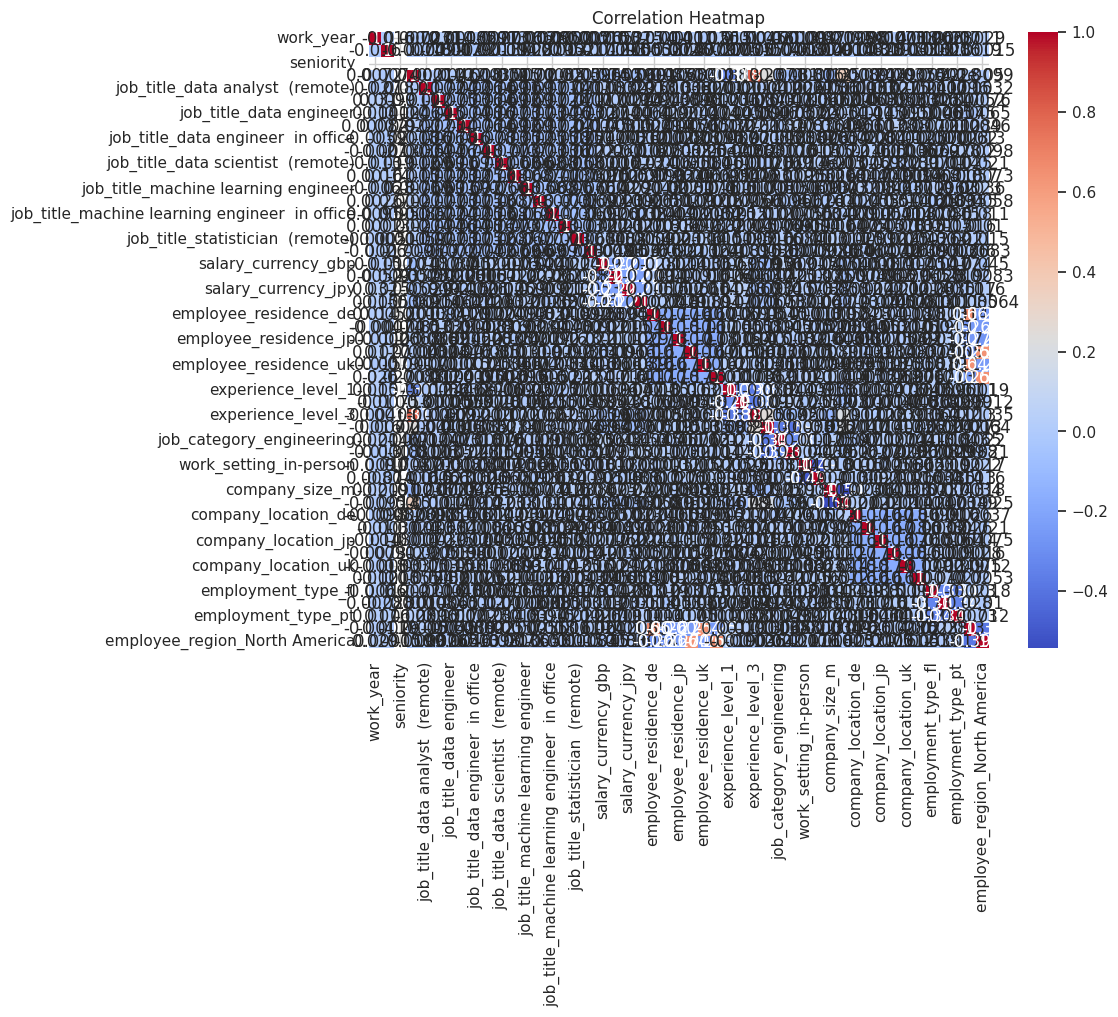

In [209]:
#  Feature Selection


# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()




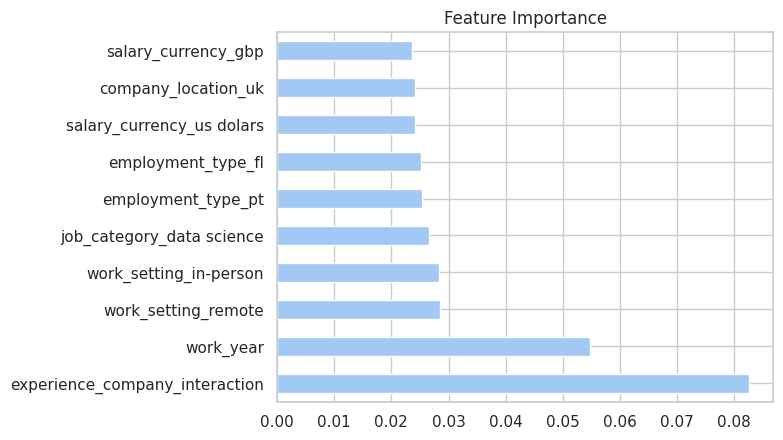

In [208]:


# Feature importance using Random Forest
from sklearn.ensemble import RandomForestRegressor
X = df.drop(columns=['salary_in_usd'])
y = df['salary_in_usd']
model = RandomForestRegressor(random_state=42)
model.fit(pd.get_dummies(X), y)

# Plot feature importance
importances = pd.Series(model.feature_importances_, index=pd.get_dummies(X).columns)
importances.sort_values(ascending=False).head(10).plot(kind='barh', title='Feature Importance')
plt.show()

In [210]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



# Splitting data
X = pd.get_dummies(df.drop(columns=['salary_in_usd']))
y = df['salary_in_usd']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)





In [211]:
# Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)
print("Linear Regression RMSE:", mean_squared_error(y_test, lr_preds, squared=False))
print("Linear Regression R2:", r2_score(y_test, lr_preds))


Linear Regression RMSE: 49054.34633863955
Linear Regression R2: -0.027843238240039758


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [212]:

# Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
print("Random Forest RMSE:", mean_squared_error(y_test, rf_preds, squared=False))
print("Random Forest R2:", r2_score(y_test, rf_preds))


Random Forest RMSE: 49943.03234609514
Random Forest R2: -0.06542212709247042


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [213]:
# XGBoost
from xgboost import XGBRegressor
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)
print("XGBoost RMSE:", mean_squared_error(y_test, xgb_preds, squared=False))
print("XGBoost R2:", r2_score(y_test, xgb_preds))

XGBoost RMSE: 54672.50250862501
XGBoost R2: -0.276761531829834


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



##Documentation: Initial Model Evaluation
The initial evaluation of three models—Linear Regression, Random Forest, and XGBoost—revealed that none of them performed well on the current dataset. Linear Regression showed the best performance with an RMSE of 49,054.35 and an R² of -0.0278, indicating that it slightly outperformed the other models but still failed to capture the patterns effectively. Random Forest had an RMSE of 49,943.03 and an R² of -0.0654, while XGBoost struggled the most, with an RMSE of 54,672.50 and an R² of -0.2768. The high RMSE and negative R² values across all models suggest that the features currently used are insufficient or that the models require further tuning. Moving forward, improvements through feature engineering, hyperparameter tuning, and potentially scaling numerical variables are essential to enhance predictive accuracy.